<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Detección de Anomalías.</h2></font>
<font color="#6E6E6E"><h2 align="left">Tarea 0. Definición de Anomalía.</h2></font>
<font color="#6E6E6E"><h3 align="left">Emma Amorós Belda.</h3></font>

# ¿Qué es un valor atípico?

Analiza el siguiente conjunto de datos y determina si crees que tenemos outliers.

Dataset: El dataset contiene un subset de un estudio sobre métodos anticonceptivos en mujeres de Indonesia (1987 National Indonesia Contraceptive Prevalence Survey), de mujeres donde se informa la edad y el número de hijos.
(Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science)

¿Tenemos outliers en las variables numércias? (edad y número de hijos)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Datamecum/PSD3/Anomalias/data/cmc.data", delimiter=",", header = None,
                   names = ['Age', 'Education', 'Husband_education', 'Children', 'Religion', 'Work', 'Husband_work',
                           'Living_index', 'Media_exposure', 'Contraceptive'])
print(data.shape)

(1473, 10)


In [5]:
data.head()

Age  Education  Husband_education  Children  Religion  Work  Husband_work  \
0   24          2                  3         3         1     1             2   
1   45          1                  3        10         1     1             3   
2   43          2                  3         7         1     1             3   
3   42          3                  2         9         1     1             3   
4   36          3                  3         8         1     1             3   

   Living_index  Media_exposure  Contraceptive  
0             3               0              1  
1             4               0              1  
2             4               0              1  
3             3               0              1  
4             2               0              1

In [6]:
# seleccionamos las columnas de interés

data = data[['Age','Children']]
data.head()

Age  Children
0   24         3
1   45        10
2   43         7
3   42         9
4   36         8

# Análisis Univariante

<Axes: xlabel='Age', ylabel='count'>

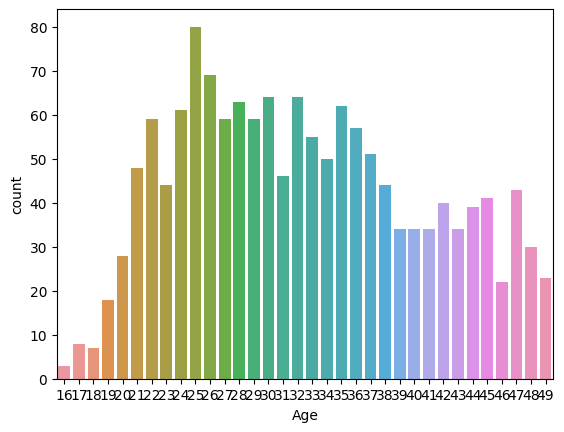

In [7]:
# representa las distribuciones de ambas variables

# age

sns.countplot(x='Age', data=data)

<Axes: xlabel='Children', ylabel='count'>

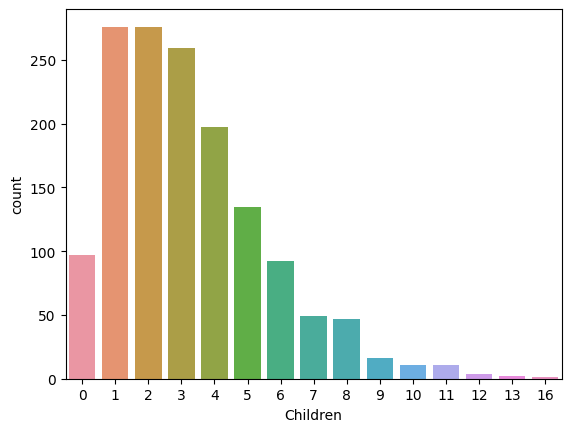

In [8]:
# children
sns.countplot(x='Children', data=data)

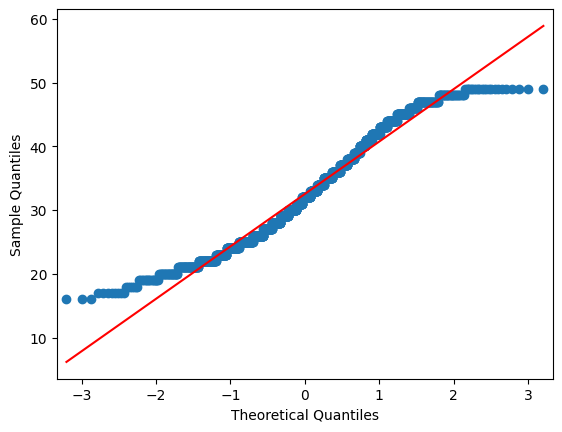

In [12]:
# podemos aplicar estadísticos para normalidad en los datos -- ADVANCED

from numpy.random import seed, randn
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

qqplot(data['Age'], line ='s')
plt.show()

# Outliers individuales

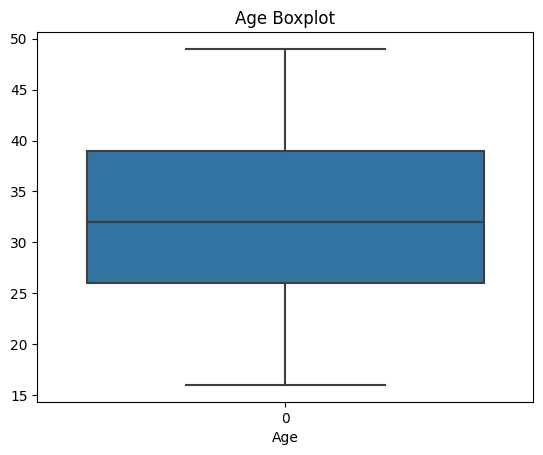

In [14]:
# vemos el boxplot de las variables individuales

# Age

sns.boxplot(data['Age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

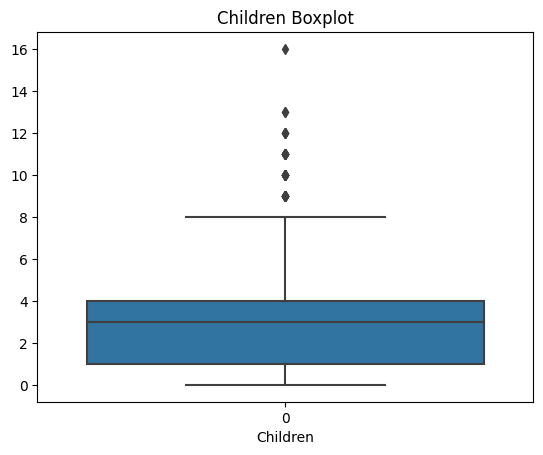

In [15]:
# Children

sns.boxplot(data['Children'])
plt.title('Children Boxplot')
plt.xlabel('Children')
plt.show()

Razona: ¿Tenemos outliers en los datos?

In [17]:
# outliers atendiendo a los quantiles -- ADVANCED

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

IQR = np.abs(Q1-Q3) # rango intercuartílico
print(IQR)

13.0


In [19]:
data[data['Age'] < Q1 - 1.5*IQR]

Empty DataFrame
Columns: [Age, Children]
Index: []

In [21]:
data[data['Age'] > Q3 + 1.5*IQR]

Empty DataFrame
Columns: [Age, Children]
Index: []

In [22]:
Q1 = data['Children'].quantile(0.25)
Q3 = data['Children'].quantile(0.75)

IQR = np.abs(Q1-Q3) # rango intercuartílico
print(IQR)

3.0


In [23]:
data[data['Children'] < Q1 - 1.5*IQR]

Empty DataFrame
Columns: [Age, Children]
Index: []

In [24]:
data[data['Children'] > Q3 + 1.5*IQR]

Age  Children
1      45        10
3      42         9
35     42         9
60     42        10
95     41        10
179    49        10
182    42        12
192    44        11
200    42        11
249    46        11
267    42        10
296    49         9
444    49        10
485    47        11
519    43        13
561    49        11
564    47        10
653    48        16
675    49        13
747    44        11
834    41         9
955    35         9
993    46         9
998    36        11
999    46         9
1001   41        11
1013   38        12
1029   43        10
1045   44         9
1063   45        11
1110   34         9
1120   39        10
1138   48        11
1139   47        12
1142   42        12
1152   46        10
1204   38        10
1223   45         9
1248   44         9
1271   35         9
1324   38         9
1342   37         9
1344   37        11
1405   47         9
1415   36         9

## Considera las dos variables para determinar los outliers



In [25]:
# representación gráfica conjunta (x = Age, y = children)

df_outlier = data[data['Children'] > Q3 + 1.5*IQR]

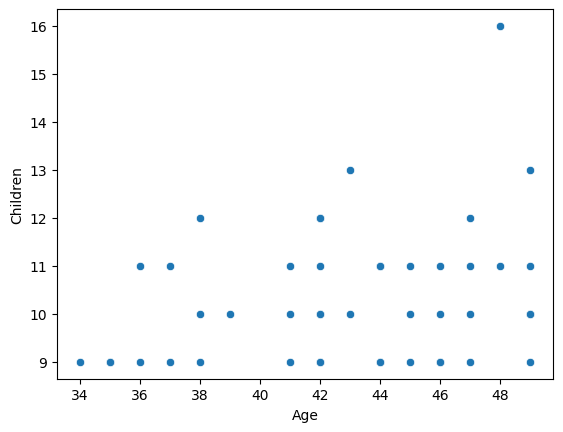

In [26]:
sns.scatterplot(df_outlier, x = 'Age', y = 'Children')
plt.show()

Conclusión: ¿los seguimos considerando outliers?